In [1]:
from qcodes_contrib_drivers.drivers.Sirah.Matisse import *
import qcodes as qc
from qcodes.loops import Loop
import visa
from qcodes.dataset.plotting import plot_dataset
import time

In [2]:
rm = visa.ResourceManager()

rm.list_resources()

('USB0::0x17E7::0x0101::15-25-15::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR')

In [ ]:
vinstr = rm.open_resource("USB0::0x17E7::0x0101::15-25-15::INSTR")

In [ ]:
vinstr.query("MOTBI:CL")

In [ ]:
vinstr.query("MOTTE:CL")

In [ ]:
vinstr.query("ERR:CL")

In [ ]:
vinstr.query("IDN?")

In [ ]:
vinstr.read_raw()

In [ ]:
vinstr.close()

In [3]:
instr = SirahMatisse("matisse", "USB0::0x17E7::0x0101::15-25-15::INSTR")

Connected to: :IDN: "Matisse TR S/N:15-25-15 (serial:DSP Rev.:01.01, firmware:Firmware:1.13, Date:Jan 27 2015") in 0.02s


In [15]:
instr.ask("ERR:CL")

'OK'

In [19]:
instr.bifi.position()

98050

In [17]:
instr.bifi.position(98000)

In [25]:
# Sweep position from 98000 to 100000 in steps of 50

# Following line doesn't work because sweep-fucntion generates floats instead of ints:
# loop = Loop(instr.bifi.position.sweep(98000, 100000, step=50)).each(...)

# Instead use a range
rng = range(98000, 99000, 50)
loop = Loop(instr.bifi.position[rng]).each(instr.bifi.position, instr.power_diode_dc, instr.te_reflex)

In [26]:
# Run sweep

# There will be a problem running the sweep, because setting the position
# doesn't wait until the position is reached. Need to do something to prevent
# this... (maybe there is a wait-command or poll the position by hand, e.g. poll status != idle)

data = loop.run()

Started at 2020-10-15 12:18:33
## SirahMatisse._float_parser(:DPOW:DC: 1.269531e-01)
## SirahMatisse._float_parser(:TE:DC: 2.832031e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.269531e-01)
## SirahMatisse._float_parser(:TE:DC: 2.832031e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.279297e-01)
## SirahMatisse._float_parser(:TE:DC: 2.832031e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.279297e-01)
## SirahMatisse._float_parser(:TE:DC: 2.832031e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.279297e-01)
## SirahMatisse._float_parser(:TE:DC: 2.890625e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.337891e-01)
## SirahMatisse._float_parser(:TE:DC: 2.890625e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.337891e-01)
## SirahMatisse._float_parser(:TE:DC: 2.890625e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.337891e-01)
## SirahMatisse._float_parser(:TE:DC: 2.939453e-01)
## SirahMatisse._float_parser(:DPOW:DC: 1.328125e-01)
## SirahMatisse._float_parser(:TE:DC: 2.939453e-01)
## SirahMatisse

In [27]:
data

DataSet:
   location = 'data/2020-10-15/#008_{name}_12-18-33'
   <Type>   | <array_id>                | <array.name>   | <array.shape>
   Setpoint | matisse_bifi_position_set | position       | (20,)
   Measured | matisse_bifi_position     | position       | (20,)
   Measured | matisse_power_diode_dc    | power_diode_dc | (20,)
   Measured | matisse_te_reflex         | te_reflex      | (20,)

In [28]:
# Here you will see that sweeping is faster than setting the position
print("POSITION SET", "\t", "MEASURED POS", "\t", "POWER DIODE", "\t", "THIN ETALON REFLEX")
for i, setpoint in enumerate(data.matisse_bifi_position_set):
    print(setpoint, "\t", data.matisse_bifi_position[i], "\t", data.matisse_power_diode_dc[i], "\t", data.matisse_te_reflex[i])

POSITION SET 	 MEASURED POS 	 POWER DIODE 	 THIN ETALON REFLEX
98000.0 	 98000.0 	 0.1269531 	 0.2832031
98050.0 	 98009.0 	 0.1269531 	 0.2832031
98100.0 	 98050.0 	 0.1279297 	 0.2832031
98150.0 	 98050.0 	 0.1279297 	 0.2832031
98200.0 	 98050.0 	 0.1279297 	 0.2890625
98250.0 	 98050.0 	 0.1337891 	 0.2890625
98300.0 	 98050.0 	 0.1337891 	 0.2890625
98350.0 	 98050.0 	 0.1337891 	 0.2939453
98400.0 	 98050.0 	 0.1328125 	 0.2939453
98450.0 	 98050.0 	 0.1328125 	 0.2910156
98500.0 	 98050.0 	 0.1328125 	 0.2910156
98550.0 	 98050.0 	 0.1328125 	 0.2910156
98600.0 	 98050.0 	 0.1328125 	 0.2880859
98650.0 	 98050.0 	 0.1328125 	 0.2880859
98700.0 	 98050.0 	 0.1328125 	 0.2880859
98750.0 	 98050.0 	 0.1328125 	 0.2851563
98800.0 	 98050.0 	 0.1318359 	 0.2851563
98850.0 	 98050.0 	 0.1318359 	 0.2851563
98900.0 	 98050.0 	 0.1318359 	 0.2841797
98950.0 	 98050.0 	 0.1328125 	 0.2841797


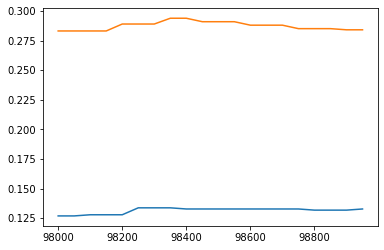

In [31]:
import matplotlib.pyplot as plt

x = data.matisse_bifi_position_set
y_list = [data.matisse_power_diode_dc, data.matisse_te_reflex]

for y in y_list:
    plt.plot(x, y)

In [32]:
instr.close()